GrammarGraph lets you build a directed graph from a context-free grammar (CFG).
A context-free grammar is a mapping from nonterminals to lists of expansion alternatives.
For instance, the following grammar represents a CSV file:

In [1]:
import string
from typing import List, Dict

CSV_GRAMMAR: Dict[str, List[str]] = {
    '<start>': ['<csvline>'],
    '<csvline>': ['<items>'],
    '<items>': ['<item>,<items>', '<item>'],
    '<item>': ['<letters>'],
    '<letters>': ['<letter><letters>', '<letter>'],
    '<letter>': list(string.ascii_letters + string.digits + string.punctuation + ' \t\n')
}

This particular representation of a grammar is based on the [Fuzzing Book](https://www.fuzzingbook.org/).
Such a grammar can, e.g., be used to create random CSV files (based on Fuzzing Book implementations,
this is independent from GrammarGraph):

In [2]:
from fuzzingbook.GrammarCoverageFuzzer import GrammarCoverageFuzzer

fuzzer = GrammarCoverageFuzzer(CSV_GRAMMAR)

for _ in range(10):
    print(fuzzer.fuzz())

r,#k
!Udi,z`C/,?t.
@sYh,nW
	cK
+
yT
x
N}X
|<q',b,j%,^-="[Hw,S
l,
u,Q,7aO


Using GrammarGraph, we can visualize this grammar based on GraphViz. To make sure everything
fits on the screen, we reduce the number of alternatives for the `<letter>` nonterminal.

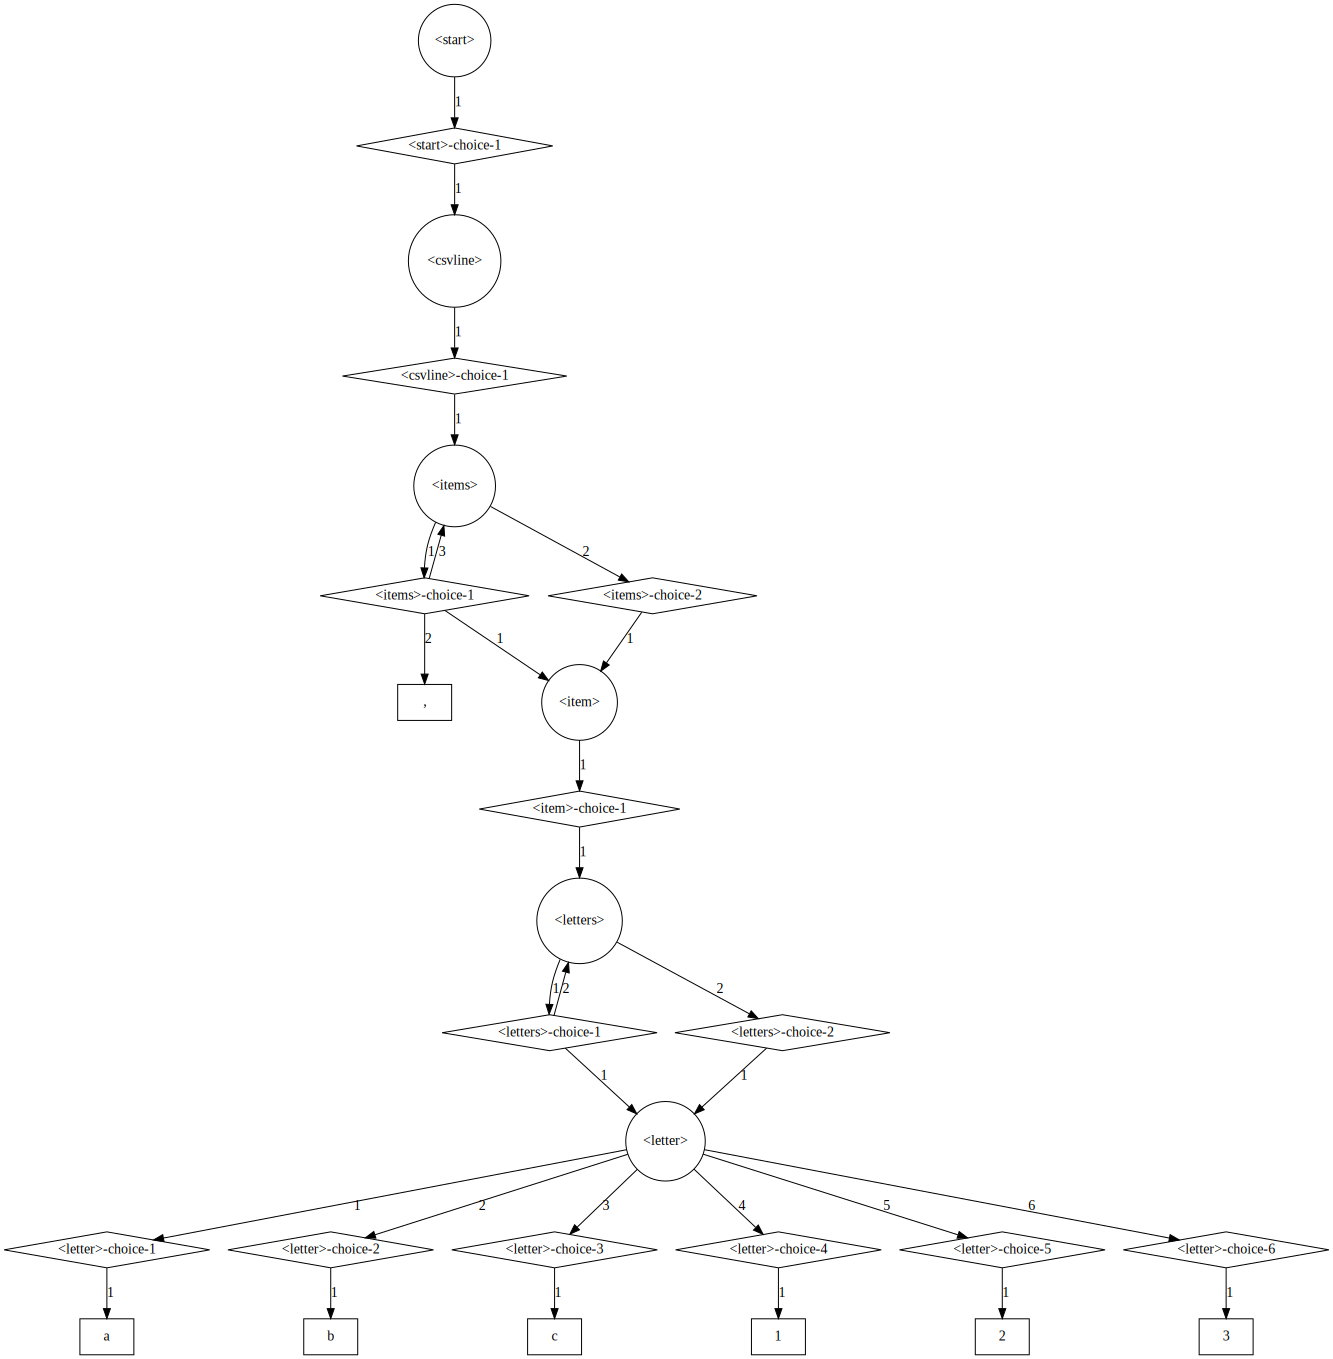

In [3]:
CSV_GRAMMAR["<letter>"] = ['a', 'b', 'c', '1', '2', '3']

from grammar_graph.gg import GrammarGraph

graph = GrammarGraph.from_grammar(CSV_GRAMMAR)
graph.to_dot()

We can create and visualize sub graphs:

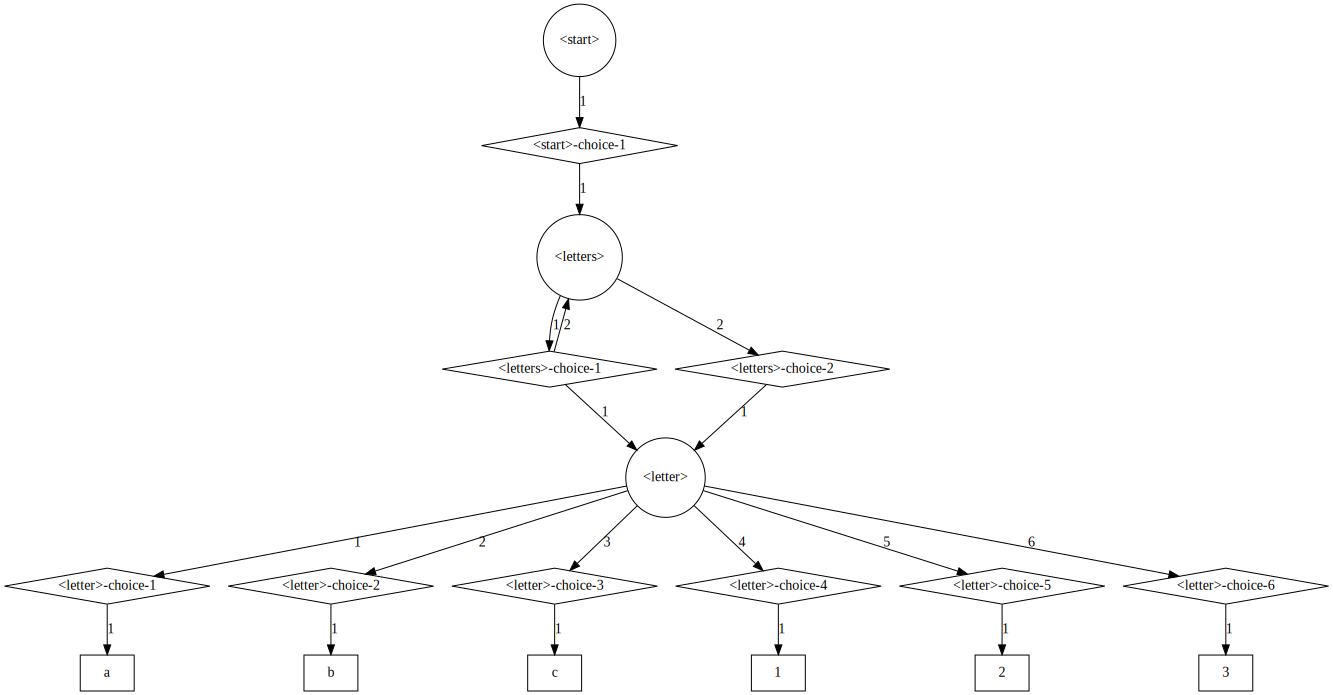

In [4]:
graph.subgraph("<letters>").to_dot()

We can also check whether a subgraph is a tree structure (and can thus, e.g., be trivially
converted to a regular expression), or whether a node is reachable from another one:

In [5]:
graph.subgraph("<letter>").is_tree()

True

In [6]:
graph.subgraph("<letters>").is_tree()

False

In [7]:
graph.get_node("<letters>").reachable(graph.get_node("<letters>"))

True

You can also create a sub grammar from a sub graph.

In [8]:
graph.subgraph("<letters>").to_grammar()

{'<start>': ['<letters>'],
 '<letters>': ['<letter><letters>', '<letter>'],
 '<letter>': ['a', 'b', 'c', '1', '2', '3']}

GrammarGraph features implementations of breadth-first search, filtering, and shortest path
discovery (based on Dijkstra's algorithm with Fibonacci heaps). This can, e.g., be used to
embed a subtree into a bigger context. For instance, the shortest path from `<items>` to `<letter>` is:

In [9]:
[node.symbol for node in graph.shortest_path(graph.get_node("<items>"), graph.get_node("<letter>"))]

['<items>', '<item>', '<letters>', '<letter>']